# Parameter Optimization: alpha, mu, delta
This notebook explores the effect of the parameters alpha, mu, and delta on the MS3_PO_MT algorithm. We run a grid search and visualize the results in 3D.

In [15]:
# Import required libraries
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from MS3_PO_MT import MS3_PO_MT_EVOL

# Update parameter ranges based on previous results
# (Refined: focus on region with minimal weight from previous results)
alpha_values = np.linspace(0.09, 0.135, 4)
mu_values    = np.linspace(1.15, 1.35, 4)
delta_values = np.linspace(0.16, 0.18, 4)

# Create a list of all parameter combinations
grid = list(product(alpha_values, mu_values, delta_values))

In [16]:
# --- Define or load your test graph and terminals here ---
np.random.seed(42)
n_nodes = 20
Graphe = np.random.rand(n_nodes, n_nodes)
Graphe[Graphe < 0.7] = np.inf  # Sparsify
np.fill_diagonal(Graphe, np.inf)
Graphe = np.minimum(Graphe, Graphe.T)  # Symmetrize
Terminaux = set([0, n_nodes-1])

# --- Run the grid search ---
results = []
for (alpha, mu, delta) in tqdm(grid, desc="Grid Search"):
    try:
        blob = MS3_PO_MT_EVOL(Graphe, Terminaux, M=10, K=300, alpha=alpha, mu=mu, delta=delta, S=3, display_result=False)
        # Ensure weight is always positive (or np.nan if invalid)
        weight = np.sum(blob[np.isfinite(blob)])
        if weight < 0 or not np.isfinite(weight):
            weight = np.nan
    except Exception as e:
        print(f"Error for params: alpha={alpha}, mu={mu}, delta={delta}: {e}")
        weight = np.nan
    results.append({
        'alpha': alpha,
        'mu': mu,
        'delta': delta,
        'weight': weight
    })

Grid Search:   2%|▏         | 1/64 [00:05<05:15,  5.00s/it]c:\Users\gauth\Projets\BlobSPTG\MS3_PO_MT.py:328: RuntimeWarning: invalid value encountered in scalar subtract
  base_update = Dij + alpha * abs(Qij) - mu * Dij
Grid Search: 100%|██████████| 64/64 [08:55<00:00,  8.36s/it]


In [4]:
df_results = pd.DataFrame(results)
df_results = df_results.dropna(subset=['weight'])
df_results.head()

,alpha,mu,delta,weight
0,0.09,1.150000,0.160000,0.0
1,0.09,1.150000,0.166667,0.0
2,0.09,1.150000,0.173333,0.0
3,0.09,1.150000,0.180000,0.0
4,0.09,1.216667,0.160000,0.0


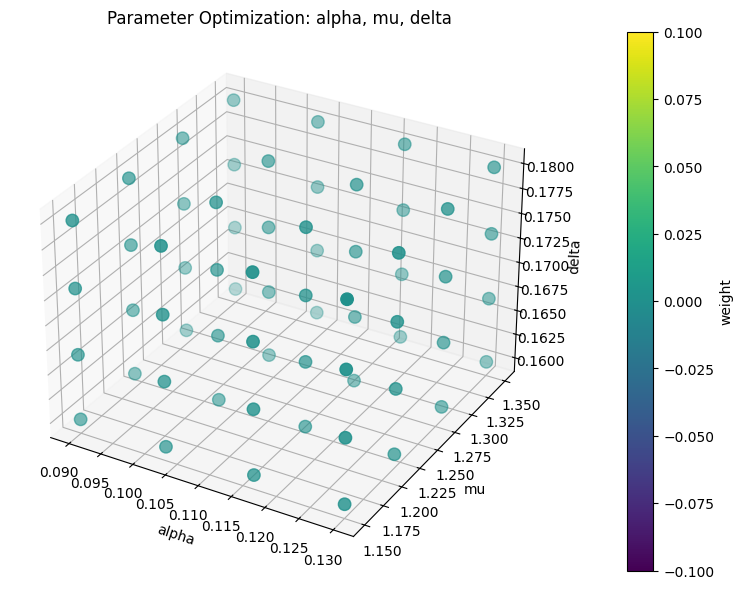

In [14]:
# 3D scatter: alpha, mu, delta vs weight
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_results['alpha'], df_results['mu'], df_results['delta'], c=df_results['weight'], cmap='viridis', s=80)
ax.set_xlabel('alpha')
ax.set_ylabel('mu')
ax.set_zlabel('delta')
ax.set_title('Parameter Optimization: alpha, mu, delta')
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('weight')
plt.show()